# Logistic Regression

In [29]:
# file path exist
import os.path
from os import path

# translator
import googletrans
from googletrans import Translator

# pandas
import pandas as pd

# preprocessing of text
import re
import string
import nltk

# word tokenizer by nltk
from nltk import word_tokenize

# lemmatizer
from nltk.stem import WordNetLemmatizer

# stopwords (Remove buzz words)
from nltk.corpus import stopwords

# split data into train and test
from sklearn.model_selection import train_test_split

# bag of words
from sklearn.feature_extraction.text import CountVectorizer

# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

# RFM classifier from scikit learn
from sklearn.linear_model import LogisticRegression

# Tf-idf feature extraction 
from sklearn.feature_extraction.text import TfidfVectorizer

# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# cross validation for kfold
from sklearn.model_selection import cross_val_score

# calc accuracy
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [2]:

# original hindi file
filename  = '../Eng-Hin-data/english-anot-shuffled'
orig_df = pd.read_csv(filename + '.csv',  
               delimiter=',')
orig_df.columns = ['Text', 'Label']

In [3]:
orig_df.head()

,Text,Label
0,'@Cricket_Mann And they will see more of it no...,0
1,"""Juma'at Kareem to all my Muslim brother aroun...",1
2,'Thorpe becomes England head coach for Pakista...,0
3,'@ParZevil Plymouth Cricket. THREE transmissions.,0
4,'jungkook didnâ€™t get caught eating food duri...,1


In [4]:
orig_df["Text"] = orig_df["Text"].astype(str)
orig_df["Label"] = orig_df["Label"].astype(str)
df = orig_df

In [5]:
# Displaying eg tweet before translation
df.Text[6]

"'@SakibulHoque8 @ImranKhanPTI Terrorist is a Muslim.ðŸ˜€"

In [6]:
df.Text[6]

"'@SakibulHoque8 @ImranKhanPTI Terrorist is a Muslim.ðŸ˜€"

### Class count

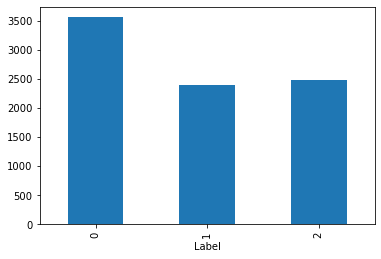

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
df.groupby('Label').Text.count().plot.bar(ylim=0)
plt.show()

In [8]:
# For entire dataset sentences for each labels 
df.Label.value_counts()

0    3555
2    2485
1    2398
Name: Label, dtype: int64

In [9]:
#balancing data 
from collections import Counter
import numpy as np
def balanceClasses(xs, ys):
    item = {}
    new_ys = []
    new_xs = []
    #"""Undersample xs, ys to balance classes."""
    freqs = Counter(ys)
    # the most common class  is the maximum number we want for all classes
    max_allowable = (freqs.most_common()[0][1])
    
    for val in freqs.most_common(): # List
        nums = np.random.randint(1000)
        i = 1
        item[val[0]] = max_allowable - val[1]
        
        if item[val[0]] > 0:            
            while(item[val[0]] - i != 0): 
                nums = nums + 1
                if ys[nums] == val[0]:
                    i += 1
                    new_ys.append(ys[nums])
                    new_xs.append(xs[nums])
    return new_xs, new_ys

In [10]:
new_text, new_label = balanceClasses(df['Text'], df['Label'])

In [11]:
data = pd.DataFrame(new_text)
data.columns = ['Text']
data['Label'] = new_label
data = pd.concat([df, data])

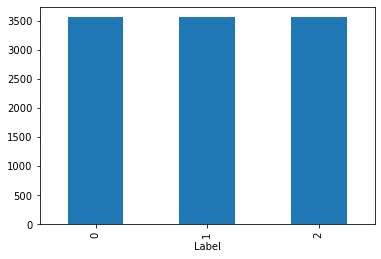

In [12]:
fig1 = plt.figure(figsize=(6,4))
data.groupby('Label').Text.count().plot.bar(ylim=0)
plt.show()

In [13]:
data.Label.value_counts()

0    3555
1    3554
2    3554
Name: Label, dtype: int64

In [14]:
data=data.sample(frac=1).reset_index(drop=True)
data

,Text,Label
0,@YamlaJutt5 @DiwanaLahori @majorgauravarya Mug...,2
1,"""@guardian Verses of Quran are now irrelevant...",2
2,'@Ssaniya_ We donâ€™t want Radical Islamic Ter...,2
3,'@TheProudIndianM @Tejasvi_Surya WHAT ABOUT RA...,2
4,'@AmaalMallik Happy muharramâ¤ðŸ˜Š @ArmaanMal...,1
...,...,...
10658,'Happy new year with khair &amp Aafiyat may ...,1
10659,'Happy eid Mubarak,1
10660,'BCCI is willing to host a farewell match for ...,0
10661,'@bhogleharsha Way to kill cricket.. curators ...,0


### Data Preprocessing

In [15]:
# People usually join sentences using more than one colon 

def ReplaceDoubleColon(inputString):
    return inputString.replace("..", " ") 

data['Text'] = data['Text'].apply(lambda x: ReplaceDoubleColon(x))

def ReplaceTripleColon(inputString):
    return inputString.replace("...", " ") 

data['Text'] = data['Text'].apply(lambda x: ReplaceTripleColon(x))

def ReplaceFourColon(inputString):
    return inputString.replace("....", " ") 

data['Text'] = data['Text'].apply(lambda x: ReplaceFourColon(x))

In [16]:
def textPattern(text):

    # Clean the text
    text = re.sub(r"@", " ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", "have", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"aren't", "are not", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"didn't", "did not", text)
    text = re.sub(r"doesn't", "does not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"hadn't", "had not", text)
    text = re.sub(r"hasn't", "has not", text)
    text = re.sub(r"haven't", "have not", text)
    text = re.sub(r"isn't", "is not", text)
    text = re.sub(r"shouldn't", "should not", text)
    text = re.sub(r"wasn't", "was not", text)
    text = re.sub(r"weren't", "were not", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"wouldn't", "would not", text)
    text = re.sub(r"mustn't", "must not", text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"\'re", "are", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\= =", " ", text)
    text = re.sub(r"\==", " ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"\s{2,}", " ", text)
    return text

data['Text'] = data['Text'].apply(lambda x: textPattern(x))

In [17]:
# Word Tokenization
tokens = [word_tokenize(sen) for sen in data.Text]

In [18]:
# Lower Case
def lower_token(tokens): 
    return [w.lower() for w in tokens]    
    
lower_tokens = [lower_token(token) for token in tokens]

In [19]:
# Remove Link

def removeLink(token):
    word = []
    for w in token:
        if not w.startswith('http'):
            word.append(w)
    return word 
    
removedLink_tokens = [removeLink(token) for token in lower_tokens]

In [20]:
# Word Lemmatization
def lemmatization(token):
    return [lemmatizer.lemmatize(w) for w in token] 

lemmatizer = WordNetLemmatizer()

lemmatized_tokens = [lemmatization(token) for token in removedLink_tokens]

In [21]:
# Removing Stopwords
stoplist = stopwords.words('english')

In [22]:
def removeStopWords(tokens): 
    return [word for word in tokens if word not in stoplist]

filtered_words = [sen for sen in lemmatized_tokens]
data['Text_Final'] = [' '.join(sen) for sen in filtered_words]
data['tokens'] = filtered_words

In [23]:
zero  = []
one = []
two = []
for l in data.Label:
    
    if l == '0':
        zero.append(1)
        one.append(0)
        two.append(0)
    elif l == '1':
        zero.append(0)
        one.append(1)
        two.append(0)
    elif l == '2':
        zero.append(0)
        one.append(0)
        two.append(1)
        
data['0']= zero
data['1']= one
data['2']= two

data = data[['Text_Final', 'tokens', 'Label', '0', '1', '2']]

In [24]:
category_id = []
for l in data.Label:
    
    if l == '0':
        category_id.append('0')
    elif l == '1':
        category_id.append('1')
    elif l == '2':
        category_id.append('2')
        
data['Category_id'] = category_id

data = data[['Text_Final', 'tokens', 'Label', '0', '1', '2', 'Category_id' ]]
data.head(25)

,Text_Final,tokens,Label,0,1,2,Category_id
0,yamlajutt5 diwanalahori majorgauravarya mughal...,"[yamlajutt5, diwanalahori, majorgauravarya, mu...",2,0,0,1,2
1,`` guardian verse of quran are now irrelevant ...,"[``, guardian, verse, of, quran, are, now, irr...",2,0,0,1,2
2,ssaniya_ we donâ€™t want radical islamic terr0...,"[ssaniya_, we, donâ€™t, want, radical, islamic...",2,0,0,1,2
3,theproudindianm tejasvi_surya what about radic...,"[theproudindianm, tejasvi_surya, what, about, ...",2,0,0,1,2
4,amaalmallik happy muharramâ¤ðÿ˜š armaanmalik2...,"[amaalmallik, happy, muharramâ¤ðÿ˜š, armaanma...",1,0,1,0,1
5,prajavani why so much importance for a videshi...,"[prajavani, why, so, much, importance, for, a,...",0,1,0,0,0
6,tarak9999 n t rama rao jr wish you a very happ...,"[tarak9999, n, t, rama, rao, jr, wish, you, a,...",1,0,1,0,1
7,i have few joke on pisslam but it need zoo_bea...,"[i, have, few, joke, on, pisslam, but, it, nee...",2,0,0,1,2
8,sagarikaghose jehadi prostitute defending isla...,"[sagarikaghose, jehadi, prostitute, defending,...",2,0,0,1,2
9,thesquind it is not only in india it is a thre...,"[thesquind, it, is, not, only, in, india, it, ...",2,0,0,1,2


In [25]:
data = data[data.tokens != '']

In [26]:
from io import StringIO
category_id_df = data[['Label', 'Category_id']].drop_duplicates().sort_values('Category_id')
category_to_label_dict = dict(category_id_df.values)
label_to_category_dict = dict(category_id_df[['Category_id', 'Label']].values)

#### Split Data into test and train
We will use 90 % data for training and 10 % for testing. We use random state so every time we get the same training and testing data.

# Logistic Regression

### Generating features using TF-IDF Vectorizer method

In [27]:
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=2, norm='l2', encoding='latin-1', ngram_range=(1, 5), stop_words='english')
features = vectorizer.fit_transform(data.Text_Final).toarray()
labels = data.Label
features.shape

(10663, 60925)

### Testing SVM models using K-fold cross validation


In [30]:
import random

# Creating model 
model = LogisticRegression(random_state=0, tol=1e-5, verbose=1, max_iter=10000)

# KFold cross-validation
kFold = 10

scores = []
#To get accuracy of the model for 10 different splits
scoreValue = cross_val_score(model, features, labels, scoring='accuracy', cv= kFold)

# append name and score of each model with different splits
print("Logistic Regression with Tf-idf: ")
for fold_idx, accuracy in enumerate(scoreValue):
    print ((fold_idx + 1), accuracy)
    scores.append(accuracy)
    
Mean_score =  sum(scores) / len(scores)
print(f" Average Accuracy : {Mean_score}" )


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Logistic Regression with Tf-idf: 
1 0.9559512652296157
2 0.9737582005623243
3 0.9662605435801312
4 0.9681050656660413
5 0.9727954971857411
6 0.9577861163227017
7 0.9727954971857411
8 0.9643527204502814
9 0.9662288930581614
10 0.9652908067542214
 Average Accuracy : 0.9663324605994961


### Spliting data 90/ 10

In [31]:
# Using similar split as CNN model
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(features, labels, data.index, test_size=0.10, random_state=82)

### LR - Generating model 

In [32]:
# generate Linear SVM model
model = LogisticRegression()
clf = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### LR - Showing some prediction

In [33]:
# 0
print(clf.predict(vectorizer.transform(["These media fellows have time to dissect one's social media profile,but none of spineless jokers has the guts to question as to why and how a convict like Lalu Yadav is roaming outside and running a Government."])))

['0']


In [34]:
# 2
print(clf.predict(vectorizer.transform(["Muslim asshole jehadi!"])))

['2']


In [35]:
# 1
print(clf.predict(vectorizer.transform(["I have a muslim friend and Islam is beautiful"])))

['1']


In [36]:
# 2
print(clf.predict(vectorizer.transform(["@Peer__Pressure_ @Totla_musa It's a religion of rape. Momo started it and it still continues to this day. Haven't you heard the saying what the right hand possess It's is from Pisslam "])))

['2']


In [120]:
#1
print(clf.predict(vectorizer.transform(["'@hiavol6 happy first day of muharram bub ily"])))

['1']


###  SVM - Displaying false-positive rate (FPR) and true positive rate (TPR)

                          Logistic Regression Method


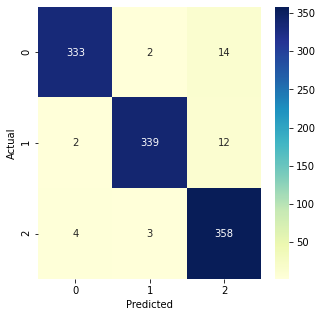

In [37]:
from sklearn.metrics import confusion_matrix
print("                          Logistic Regression Method")
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap ='YlGnBu',
            xticklabels=category_id_df.Label.values, yticklabels=category_id_df.Label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### LR - Precision, Recall and F1-Score to quantify the quality of our model using a confusion matrix

In [38]:
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred))
print ('Report : ')
print (classification_report(y_test, y_pred))

Confusion Matrix :
[[333   2  14]
 [  2 339  12]
 [  4   3 358]]
Accuracy Score : 0.9653233364573571
Report : 
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       349
           1       0.99      0.96      0.97       353
           2       0.93      0.98      0.96       365

    accuracy                           0.97      1067
   macro avg       0.97      0.97      0.97      1067
weighted avg       0.97      0.97      0.97      1067



# LR - BOW

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
features1 = count_vect.fit_transform(data.Text_Final).toarray()
labels = data.Label
features1.shape

(10663, 17023)

In [40]:
# Using similar split 90/10
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(features1, labels, data.index, test_size=0.10, random_state=72)

In [41]:
# generate Logistic Regression model
#model2 = LogisticRegression()
model2 = LogisticRegression(random_state=0, tol=1e-5, verbose=1, max_iter=10000)
clf2 = model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   41.2s finished


### LR - BOW - Showing some prediction

In [42]:
# 0
print(clf2.predict(count_vect.transform(["Cambs U18 v Under 18 Under 18 138/9 (37.4) Cambridgeshire Cricket Board Under 18 won by 111 runs"])))

['0']


In [43]:
# 2
print(clf2.predict(count_vect.transform(["Muslim asshole jehadi !"])))

['2']


In [44]:
# 1
print(clf2.predict(count_vect.transform(["I have a muslim friend and Islam is beautiful"])))

['2']


In [45]:
# 1
print(clf2.predict(count_vect.transform(["Prophet said: Whenever a Muslim supplicates for his (Muslim) brother in his absence  the angels say: `May the same be for you too"])))

['1']


###  LR - BOW - Displaying false-positive rate (FPR) and true positive rate (TPR)

                     Logistic Regression Method - BOW


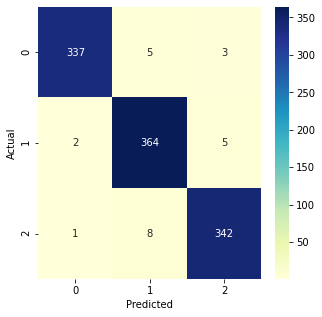

In [46]:
from sklearn.metrics import confusion_matrix
print("                     Logistic Regression Method - BOW")
conf_mat = confusion_matrix(y_test, y_pred2)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="YlGnBu",
            xticklabels=category_id_df.Label.values, yticklabels=category_id_df.Label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### LR - BOW - Precision, Recall and F1-Score to quantify the quality of our model using a confusion matrix.

In [47]:
results2 = confusion_matrix(y_test, y_pred2)
print ('Confusion Matrix :')
print(results2) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred2))
print ('Report : ')
print (classification_report(y_test, y_pred2))

Confusion Matrix :
[[337   5   3]
 [  2 364   5]
 [  1   8 342]]
Accuracy Score : 0.9775070290534208
Report : 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       345
           1       0.97      0.98      0.97       371
           2       0.98      0.97      0.98       351

    accuracy                           0.98      1067
   macro avg       0.98      0.98      0.98      1067
weighted avg       0.98      0.98      0.98      1067



### LR with BOW kfold

In [48]:
# KFold cross-validation
kFold = 10

scores = []
#To get accuracy of the model for 10 different splits
scoreValue = cross_val_score(model2, features1, labels, scoring='accuracy', cv= kFold)

# append name and score of each model with different splits
print("Logistic Regression with BOW: ")
for fold_idx, accuracy in enumerate(scoreValue):
    print ((fold_idx + 1), accuracy)
    scores.append(accuracy)
    
Mean_score =  sum(scores) / len(scores)
print(f" Average Accuracy : {Mean_score}" )

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   49.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   42.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   48.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   51.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   54.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Logistic Regression with BOW: 
1 0.9765698219306467
2 0.9709465791940018
3 0.9728209934395501
4 0.9784240150093808
5 0.9699812382739212
6 0.9699812382739212
7 0.9765478424015009
8 0.974671669793621
9 0.974671669793621
10 0.974671669793621
 Average Accuracy : 0.9739286737903786


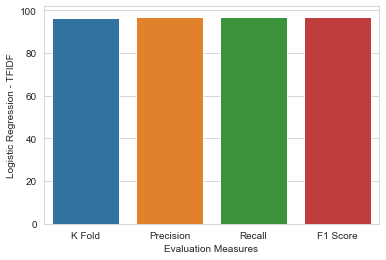

In [2]:
# for tfidf
import pandas as pd
import seaborn as sns
results=pd.DataFrame()
dictionary=dict()
dictionary['Evaluation Measures']=["K Fold", "Precision", "Recall", "F1 Score"]
dictionary['Logistic Regression - TFIDF']=[96.6, 97, 97, 97]
results=pd.DataFrame(dictionary)
sns.set_style(style="whitegrid")
ax = sns.barplot(x='Evaluation Measures', y= 'Logistic Regression - TFIDF',data=results)

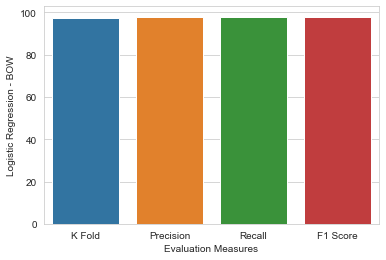

In [3]:
# for BOW
import seaborn as sns
results=pd.DataFrame()
dictionary=dict()
dictionary['Evaluation Measures']=["K Fold", "Precision", "Recall", "F1 Score"]
dictionary['Logistic Regression - BOW']=[97.3, 98, 98, 98]
results=pd.DataFrame(dictionary)
sns.set_style(style="whitegrid")
ax = sns.barplot(x='Evaluation Measures', y= 'Logistic Regression - BOW',data=results)

### Reference

[1] Multi-Class Text Classification with Scikit-Learn by Susan Li

[2] Scikit-Learn Documentation https://scikit-learn.org/